# Unit 5 - Financial Planning


In [1]:
# Initial imports
import os
import requests
import pandas as pd
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
from MCForecastTools import MCSimulation

%matplotlib inline

In [2]:
# Load .env enviroment variables
load_dotenv()

True

## Part 1 - Personal Finance Planner

### Collect Crypto Prices Using the `requests` Library

In [3]:
# Set current amount of crypto assets
my_btc = 1.2
my_eth = 5.3

In [4]:
# Crypto API URLs
btc_url = "https://api.alternative.me/v2/ticker/Bitcoin/?convert=CAD"
eth_url = "https://api.alternative.me/v2/ticker/Ethereum/?convert=CAD"

In [5]:
# Fetch current BTC price
btc_response = requests.get(btc_url).json()
btc_price = btc_response["data"]["1"]["quotes"]["USD"]["price"]

# Fetch current ETH price
eth_response = requests.get(eth_url).json()
eth_price = eth_response["data"]["1027"]["quotes"]["USD"]["price"]

# Compute current value of my crpto
my_btc_value = my_btc * btc_price
my_eth_value = my_eth * eth_price
crypto = my_btc_value + my_eth_value

# Print current crypto wallet balance
print(f"The current value of your {my_btc} BTC is ${my_btc_value:0.2f}")
print(f"The current value of your {my_eth} ETH is ${my_eth_value:0.2f}")
print(f"The current value of your Crypto is ${crypto:0.2f}")

The current value of your 1.2 BTC is $70737.60
The current value of your 5.3 ETH is $9714.90
The current value of your Crypto is $80452.50


### Collect Investments Data Using Alpaca: `SPY` (stocks) and `AGG` (bonds)

In [6]:
# Current amount of shares
my_agg = 200
my_spy = 50

In [7]:
# Set Alpaca API key and secret
alpaca_api_key = os.getenv("ALPACA_API_KEY")
alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")

# Create the Alpaca API object
alpaca = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    api_version="v2")

In [8]:
# Format current date as ISO format
today = pd.Timestamp("2021-03-19", tz="America/New_York").isoformat()

# Set the tickers
tickers = ["AGG", "SPY"]

# Set timeframe to '1D' for Alpaca API
timeframe = "1D"

# Get current closing prices for SPY and AGG
df_portfolio = alpaca.get_barset(
    tickers,
    timeframe,
    start = today
).df

# Preview DataFrame
df_portfolio.head()

AGG                                     SPY  \
                            open    high     low  close   volume    open   
time                                                                       
2021-03-19 00:00:00-04:00  113.4  113.54  113.33  113.5  4674852  389.88   

                                                             
                              high     low  close    volume  
time                                                         
2021-03-19 00:00:00-04:00  391.569  387.15  389.5  93819590

In [9]:
# Pick AGG and SPY close prices
agg_closing_price = df_portfolio["AGG"]["close"][0]
spy_closing_price = df_portfolio["SPY"]["close"][0]

# Print AGG and SPY close prices
print(f"Current AGG closing price: ${agg_closing_price}")
print(f"Current SPY closing price: ${spy_closing_price}")

Current AGG closing price: $113.5
Current SPY closing price: $389.5


In [10]:
# Compute the current value of shares
my_agg_value = my_agg * agg_closing_price
my_spy_value = my_spy * spy_closing_price
shares = my_spy_value + my_agg_value

# Print current value of share
print(f"The current value of your {my_spy} SPY shares is ${my_spy_value:0.2f}")
print(f"The current value of your {my_agg} AGG shares is ${my_agg_value:0.2f}")
print(f"The current value of shares ${my_spy_value + my_agg_value:0.2f}")

The current value of your 50 SPY shares is $19475.00
The current value of your 200 AGG shares is $22700.00
The current value of shares $42175.00


### Savings Health Analysis

In [11]:
# Set monthly household income
monthly_income = 12000

# Create savings DataFrame
investments_data = {"AMOUNT": [crypto, shares]}
investments = ["CRYPTO", "SHARES"]

# Create Savings DataFrame with `investments` as index
df_savings = pd.DataFrame(investments_data, index=investments)

# Display savings DataFrame
display(df_savings)

,AMOUNT
CRYPTO,80452.5
SHARES,42175.0


<AxesSubplot:title={'center':'Savings Portfolio Composition'}, ylabel='AMOUNT'>

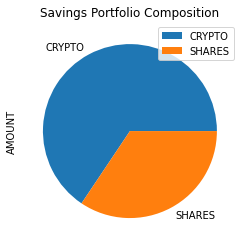

In [12]:
# Plot savings pie chart
df_savings.plot.pie(y="AMOUNT", title="Savings Portfolio Composition")

In [13]:
# Set ideal emergency fund
emergency_fund = monthly_income * 3

print(f"The emergnecy fund needed is${emergency_fund:0.2f}")

#Calculate total amount of savings 
current_total_savings=crypto+shares
print(f"The current total savings are ${current_total_savings:0.2f}")

# Compare the Total Savings amount to the amount of the required Emergency Fund
# Validate saving health
if current_total_savings > emergency_fund:
    print(f"Congratulations! Your emergency fund in good shape and you have a surplas of ${(current_total_savings-emergency_fund):0.2f}")
elif current_total_savings == emergency_fund:
    print(f"Congratulations! Your have reached your financial goal and your emegency funds meets your minimum requirement of ${(emergency_fund):0.2f}")
else:
    print(f"Keep up the good work! You are ${(emergency_fund-current_total_savings):0.2f} away from reaching your emergency fund goal of ${(emergency_fund):0.2f}")

The emergnecy fund needed is$36000.00
The current total savings are $122627.50
Congratulations! Your emergency fund in good shape and you have a surplas of $86627.50


## Part 2 - Retirement Planning

### Monte Carlo Simulation

In [14]:
# Set start and end dates of five years back from today.
# Sample results may vary from the solution based on the time frame chosen
start_date = pd.Timestamp('2015-08-07', tz='America/New_York').isoformat()
end_date = pd.Timestamp('2020-08-07', tz='America/New_York').isoformat()

In [15]:
# Get 5 years' worth of historical data for SPY and AGG
df_stock_data = alpaca.get_barset(
    tickers,
    timeframe,
    start=start_date,
    end=end_date
).df

# Display sample data
df_stock_data.head()

AGG                                        \
                             open      high       low   close    volume   
time                                                                      
2020-03-18 00:00:00-04:00  109.36  110.5700  105.7707  106.33  30117292   
2020-03-19 00:00:00-04:00  106.47  109.2200  105.5600  108.97  21031320   
2020-03-20 00:00:00-04:00  108.46  110.2399  108.4600  109.49  28449412   
2020-03-23 00:00:00-04:00  109.90  112.9400  109.0000  112.55  23873510   
2020-03-24 00:00:00-04:00  111.52  113.5000  111.0754  113.29  18141498   

                              SPY                                       
                             open      high     low   close     volume  
time                                                                    
2020-03-18 00:00:00-04:00  236.25  248.3700  228.02  241.01  298252778  
2020-03-19 00:00:00-04:00  239.25  247.3800  232.22  241.16  261233795  
2020-03-20 00:00:00-04:00  242.53  244.4700  228.50  228.94  302880969  
2020-03-23 00:00:00-04:00  228.19  229.6833  218.26  222.51  280560712  
2020-03-24 00:00:00-04:00  234.42  244.1000  233.80  243.59  211595249

In [16]:
# Configuring a Monte Carlo simulation to forecast 30 years cumulative returns
MC = MCSimulation(
    portfolio_data = df_stock_data,
    weights = [.4,.6],
    num_simulation = 500,
    num_trading_days = 252*30
)

In [17]:
# Printing the simulation input data
MC.portfolio_data.head()

AGG                                        \
                             open      high       low   close    volume   
time                                                                      
2020-03-18 00:00:00-04:00  109.36  110.5700  105.7707  106.33  30117292   
2020-03-19 00:00:00-04:00  106.47  109.2200  105.5600  108.97  21031320   
2020-03-20 00:00:00-04:00  108.46  110.2399  108.4600  109.49  28449412   
2020-03-23 00:00:00-04:00  109.90  112.9400  109.0000  112.55  23873510   
2020-03-24 00:00:00-04:00  111.52  113.5000  111.0754  113.29  18141498   

                                           SPY                            \
                          daily_return    open      high     low   close   
time                                                                       
2020-03-18 00:00:00-04:00          NaN  236.25  248.3700  228.02  241.01   
2020-03-19 00:00:00-04:00     0.024828  239.25  247.3800  232.22  241.16   
2020-03-20 00:00:00-04:00     0.004772  242.53  244.4700  228.50  228.94   
2020-03-23 00:00:00-04:00     0.027948  228.19  229.6833  218.26  222.51   
2020-03-24 00:00:00-04:00     0.006575  234.42  244.1000  233.80  243.59   

                                                   
                              volume daily_return  
time                                               
2020-03-18 00:00:00-04:00  298252778          NaN  
2020-03-19 00:00:00-04:00  261233795     0.000622  
2020-03-20 00:00:00-04:00  302880969    -0.050672  
2020-03-23 00:00:00-04:00  280560712    -0.028086  
2020-03-24 00:00:00-04:00  211595249     0.094737

In [18]:
# Running a Monte Carlo simulation to forecast 30 years cumulative returns
MC.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,...,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
1,1.020678e+00,1.007477e+00,1.005424e+00,9.716134e-01,1.023513e+00,1.003822e+00,1.003907e+00,9.992461e-01,1.016746e+00,1.016599e+00,...,9.799624e-01,1.017495e+00,9.871198e-01,1.016741e+00,9.946043e-01,1.005306e+00,1.003107e+00,9.869779e-01,1.013845e+00,9.868384e-01
2,1.018604e+00,1.019835e+00,9.873154e-01,9.592587e-01,1.012052e+00,1.031990e+00,1.029343e+00,1.000558e+00,1.023162e+00,1.022698e+00,...,9.944617e-01,1.009035e+00,9.909709e-01,1.024950e+00,9.888609e-01,1.018556e+00,1.028041e+00,9.965671e-01,1.011739e+00,9.736561e-01
3,1.028527e+00,1.016256e+00,9.784651e-01,9.637804e-01,1.013037e+00,1.027357e+00,1.018341e+00,1.002565e+00,1.006791e+00,1.030742e+00,...,1.004890e+00,1.013004e+00,9.884410e-01,1.057569e+00,9.928456e-01,1.025719e+00,1.021180e+00,9.971581e-01,1.018642e+00,9.791520e-01
4,1.013938e+00,1.027619e+00,9.728537e-01,9.482630e-01,1.024994e+00,1.031519e+00,1.016591e+00,9.796730e-01,1.021714e+00,1.021993e+00,...,1.032798e+00,1.027292e+00,9.971607e-01,1.088251e+00,9.858754e-01,1.019018e+00,1.015898e+00,9.695139e-01,1.004536e+00,9.848105e-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7556,2.065514e+08,3.096572e+08,7.246162e+07,1.223413e+08,7.864319e+07,7.352473e+07,2.252092e+08,7.090307e+08,6.905613e+07,9.499974e+08,...,6.549884e+07,1.593331e+08,7.205754e+07,2.333751e+07,7.701563e+07,8.449482e+08,3.321809e+08,4.347115e+08,3.086343e+08,3.238995e+08
7557,2.063070e+08,3.106165e+08,7.298867e+07,1.214150e+08,7.934043e+07,7.368242e+07,2.277794e+08,7.099934e+08,6.834589e+07,9.370395e+08,...,6.690359e+07,1.612943e+08,7.040442e+07,2.318790e+07,7.568167e+07,8.421479e+08,3.394333e+08,4.439073e+08,3.155397e+08,3.264308e+08
7558,2.047307e+08,3.114481e+08,7.242715e+07,1.205750e+08,7.931302e+07,7.386770e+07,2.269013e+08,7.122302e+08,6.772226e+07,9.361571e+08,...,6.694858e+07,1.588835e+08,7.007416e+07,2.349403e+07,7.696665e+07,8.414805e+08,3.303634e+08,4.459815e+08,3.157332e+08,3.365334e+08
7559,2.076950e+08,3.099361e+08,7.091440e+07,1.189782e+08,7.746721e+07,7.427332e+07,2.294037e+08,7.232304e+08,6.741701e+07,9.285118e+08,...,6.840339e+07,1.608653e+08,6.866761e+07,2.316179e+07,7.758577e+07,8.439209e+08,3.197554e+08,4.393044e+08,3.207119e+08,3.361257e+08


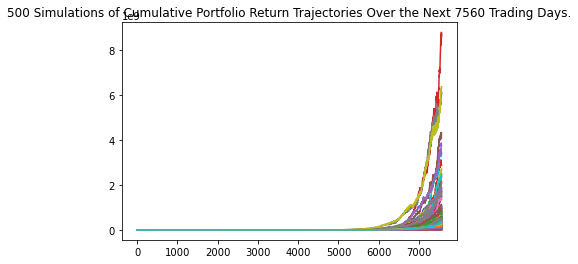

In [19]:
# Plot simulation outcomes
line_plot = MC.plot_simulation()

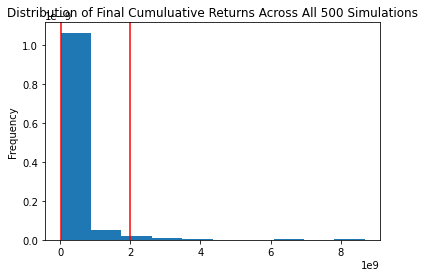

In [20]:
# Plot probability distribution and confidence intervals
dist_plot = MC.plot_distribution()

### Retirement Analysis

In [21]:
# Fetch summary statistics from the Monte Carlo simulation results
even_tbl = MC.summarize_cumulative_return()

# Print summary statistics
print(even_tbl)

count           5.000000e+02
mean            3.950462e+08
std             7.214722e+08
min             6.882971e+06
25%             8.469929e+07
50%             2.003838e+08
75%             4.237773e+08
max             8.689779e+09
95% CI Lower    2.412655e+07
95% CI Upper    1.991039e+09
Name: 7560, dtype: float64


### Calculate the expected portfolio return at the 95% lower and upper confidence intervals based on a `$20,000` initial investment.

In [22]:
# Set initial investment
initial_investment = 20000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $20,000
even_ci_lower = round(even_tbl[8]*initial_investment,2)
even_ci_upper = round(even_tbl[9]*initial_investment,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio")
print(f" over the next 30 years will end within in the range of")
print(f" ${even_ci_lower} and ${even_ci_upper}")

There is a 95% chance that an initial investment of $20000 in the portfolio
 over the next 30 years will end within in the range of
 $482530932446.91 and $39820784285397.65


### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `50%` increase in the initial investment.

In [23]:
# Set initial investment
initial_investment_new = 20000 * 1.5

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $30,000
even_ci_lower_new = round(even_tbl[8]*initial_investment_new,2)
even_ci_upper_new = round(even_tbl[9]*initial_investment_new,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment_new} in the portfolio")
print(f" over the next 30 years will end within in the range of")
print(f" ${even_ci_lower_new} and ${even_ci_upper_new}")

There is a 95% chance that an initial investment of $30000.0 in the portfolio
 over the next 30 years will end within in the range of
 $723796398670.37 and $59731176428096.48


## Optional Challenge - Early Retirement


### Five Years Retirement Option

In [24]:
# Configuring a Monte Carlo simulation to forecast 5 years cumulative returns
MC_five = MCSimulation(
    portfolio_data = df_stock_data,
    weights = [.4,.6],
    num_simulation = 500,
    num_trading_days = 252*5
)

In [25]:
# Running a Monte Carlo simulation to forecast 5 years cumulative returns
MC_five.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.987385,0.987057,1.023012,0.989985,1.003119,1.019725,1.028725,0.997177,0.994424,0.987692,...,0.994337,1.015861,0.991528,0.985002,1.012299,0.988760,0.995081,0.987410,1.001858,1.008721
2,0.991741,0.992875,1.029876,0.982422,1.020627,1.010080,1.042282,1.009742,0.993731,1.012596,...,0.992456,1.004943,0.989543,0.979062,1.006481,0.973573,1.004741,0.986420,1.002581,1.021452
3,0.976612,1.009535,1.033888,0.966130,1.018438,1.018196,1.036597,0.977708,0.985765,1.015791,...,0.992867,0.998281,0.991355,0.984749,1.001266,0.982048,0.990718,0.990197,0.989775,1.004594
4,0.957212,1.008040,1.045736,0.966032,1.007489,1.009438,1.044912,0.985342,0.988291,1.020008,...,0.993913,0.995932,0.967595,0.981290,0.997627,0.986391,0.984191,0.982170,0.995670,1.010847
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1256,10.075446,40.042806,8.919998,6.310135,22.220655,35.640408,35.369019,16.899918,31.319821,15.513453,...,33.609039,16.886377,36.352718,22.591879,58.128961,40.387616,22.438611,15.922175,26.811764,19.365809
1257,9.961017,40.528057,9.056950,6.385840,22.076788,35.807916,35.472355,16.739346,31.230451,15.450321,...,33.440133,16.761273,36.789931,23.079302,58.670074,41.171975,22.518349,15.963253,26.292412,19.852252
1258,9.948480,40.023448,9.027764,6.356794,22.558716,36.467509,36.171432,16.587037,30.669455,15.557499,...,34.181883,16.687154,37.051804,23.470950,58.299943,41.489977,22.275254,15.710548,26.307183,19.995799
1259,9.898894,40.146665,8.888342,6.416852,22.667775,36.772261,37.191888,16.472519,30.380447,15.692011,...,33.951075,16.759623,36.775142,23.650821,59.042844,42.124407,22.716638,16.170389,27.131549,20.121676


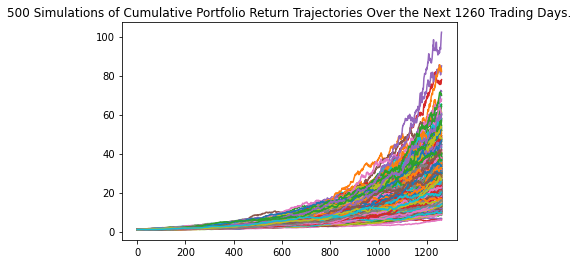

In [26]:
# Plot simulation outcomes
line_plot = MC_five.plot_simulation()

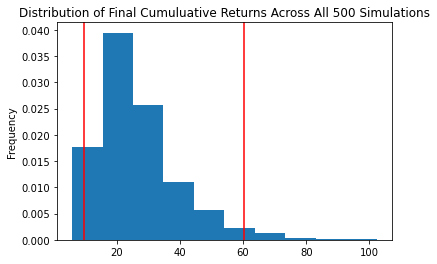

In [27]:
# Plot probability distribution and confidence intervals
dist_plot = MC_five.plot_distribution()

In [28]:
# Fetch summary statistics from the Monte Carlo simulation results
even_tbl = MC_five.summarize_cumulative_return()

# Print summary statistics
print(even_tbl)

count           500.000000
mean             26.602231
std              13.199777
min               5.902019
25%              17.209473
50%              23.870517
75%              32.927851
max             102.226061
95% CI Lower      9.730952
95% CI Upper     60.163221
Name: 1260, dtype: float64


In [29]:
# Set initial investment
initial_investment_high = 60000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
even_ci_lower_five = round(even_tbl[8]*initial_investment_high,2)
even_ci_upper_five = round(even_tbl[9]*initial_investment_high,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment_high} in the portfolio"
      f" over the next 5 years will end within in the range of"
      f" ${even_ci_lower_five} and ${even_ci_upper_five}")

There is a 95% chance that an initial investment of $60000 in the portfolio over the next 5 years will end within in the range of $583857.12 and $3609793.29


### Ten Years Retirement Option

In [30]:
# Configuring a Monte Carlo simulation to forecast 10 years cumulative returns
MC_ten = MCSimulation(
    portfolio_data = df_stock_data,
    weights = [.4,.6],
    num_simulation = 500,
    num_trading_days = 252*10
)

In [31]:
# Running a Monte Carlo simulation to forecast 10 years cumulative returns
MC_ten.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.998449,0.974939,1.015178,1.003442,0.993924,1.017979,1.024052,0.994789,1.019721,0.995473,...,1.013859,0.988501,1.002330,0.988640,0.995774,0.975304,0.992614,0.975016,1.004687,0.995558
2,0.985484,0.979744,1.020369,1.020279,0.984826,1.025865,1.010492,0.987682,1.008455,1.020114,...,1.007444,0.987885,1.005659,0.990895,1.005248,0.991270,0.980292,1.004825,0.994096,1.005307
3,0.994370,0.985685,1.029774,1.019286,0.978352,1.010218,1.005860,0.993951,1.033947,1.021286,...,0.986199,1.017162,1.010151,0.998715,1.004395,0.973580,0.987196,1.000247,0.987205,1.021528
4,1.018531,0.997321,1.048983,1.016065,0.964621,1.014972,1.016895,1.010156,1.060034,1.029860,...,1.004790,1.005669,0.986918,0.990173,0.996164,0.971394,0.981138,1.018541,0.999411,1.009759
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2516,411.758150,506.045185,620.771318,573.764368,736.912082,1442.459790,358.908044,139.759984,334.114468,475.379038,...,815.312550,617.911912,1190.834203,1061.863365,1362.965615,523.838487,325.124127,300.064546,916.558195,1138.010645
2517,422.725017,508.183983,625.407169,576.454200,735.306427,1438.295915,367.117637,141.155849,334.188854,466.201044,...,806.773152,616.969572,1177.075734,1051.586655,1388.974444,517.362226,334.366673,306.793706,925.877231,1157.311587
2518,424.385315,512.538487,621.710493,574.345036,745.433379,1434.530653,365.303049,140.546709,330.649675,472.155219,...,791.936155,633.639734,1168.726167,1056.109060,1399.023767,512.941959,336.051480,302.019223,917.573662,1164.115561
2519,424.515299,521.769861,611.971935,568.265197,739.658718,1437.693697,368.023721,142.174807,333.254636,469.961723,...,785.765455,638.991128,1171.670015,1063.237662,1419.993534,501.002874,334.635456,300.028461,948.760363,1166.797261


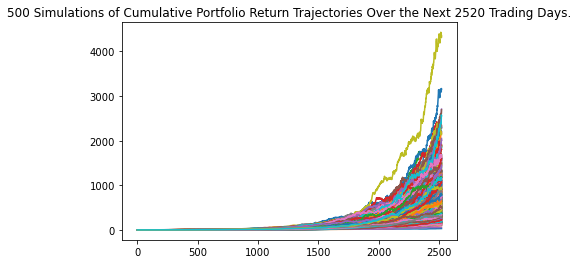

In [32]:
# Plot simulation outcomes
line_plot = MC_ten.plot_simulation()

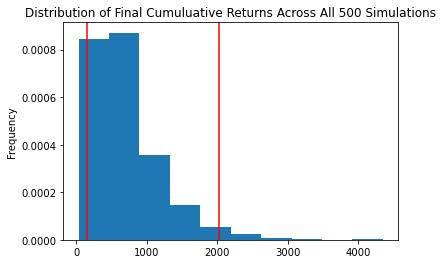

In [33]:
# Plot probability distribution and confidence intervals
dist_plot = MC_ten.plot_distribution()

In [34]:
# Fetch summary statistics from the Monte Carlo simulation results
even_tbl = MC_ten.summarize_cumulative_return()

# Print summary statistics
print(even_tbl)

count            500.000000
mean             715.450118
std              508.225756
min               30.972986
25%              366.040384
50%              568.040895
75%              910.025279
max             4348.266561
95% CI Lower     156.279206
95% CI Upper    2016.260182
Name: 2520, dtype: float64


In [35]:
# Set initial investment
initial_investment_high = 60000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
even_ci_lower_ten = round(even_tbl[8]*initial_investment_high,2)
even_ci_upper_ten = round(even_tbl[9]*initial_investment_high,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment_high} in the portfolio"
      f" over the next 10 years will end within in the range of"
      f" ${even_ci_lower_ten} and ${even_ci_upper_ten}")

There is a 95% chance that an initial investment of $60000 in the portfolio over the next 10 years will end within in the range of $9376752.37 and $120975610.9
